In [9]:
import quantile_autoreg as QAR
import pandas as pd
import os

### Intraday FX Dynamics
This notebook showcases the use of quantile regression to observe non-linear temporal dependence in FX returns at various intraday time horizons.

  Concept taken from Kuck and Maderitsch (2018) in this link: https://www.sciencedirect.com/science/article/abs/pii/S1062976918300322?dgcid=rss_sd_all
  
  They find that "intra-daily FX return autocorrelations of USD/EUR, USD/GBP and USD/JPY are U-shaped", that is, the first order autocorrelation is significantly negative at the median and positive (though insignificantly) at the extremes.  
  
  The visual result of their regressions is neat and pronounced, likely due to their wealth of data (11 years). Nonetheless, the function provided with this repository allows convenient access to similar methods in a single line of code.  
  
  __Input__: pandas series (tick data works). Timeframes can be adjusted as seen below.  
  __Output__: Graphs of the quantile autoregressions. 

In [6]:
instruments = ['EURUSD', 'GBPUSD', 'USDJPY']

data = {}
for instrument in instruments:
    data[instrument] = pd.read_hdf('fx_tick_data.h5', instrument)

### EURUSD
The study with EURUSD is consistent with the original authors' findings. The EURUSD experiences positive autocorrelation during periods of high volatility and low negative autocorrelation otherwise.   
  
  However, this result is not stable across different exchange rates, at least for the month of October 2018.


C:\Users\limpe\Desktop\Quantile Regression\quantile_autoreg.py:16: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  series = series.groupby(pd.TimeGrouper(freq=granularity)).last().fillna(method = 'ffill')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


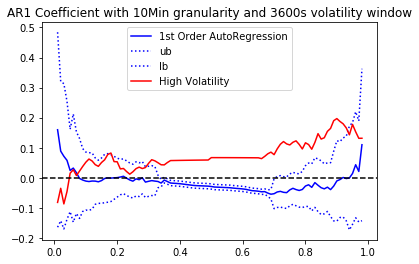

In [12]:
QAR.plot_ar1_coef_w_highvol(data['EURUSD'], granularity = '10Min')

### GBPUSD
The first order autoregression coefficient is insignificant, however, noticeably, the high volatility regressor has a signficant first order regressor. for practical purposes, this means to say that at high volatility periods, the prices tend to 'mean-revert'.  
  
For the month of October at various other timeframes, both coefficients are largely insignificant, implying little autocorrelation, not just at extremes but also during high volatiltiy periods. 

C:\Users\limpe\Desktop\Quantile Regression\quantile_autoreg.py:16: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  series = series.groupby(pd.TimeGrouper(freq=granularity)).last().fillna(method = 'ffill')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


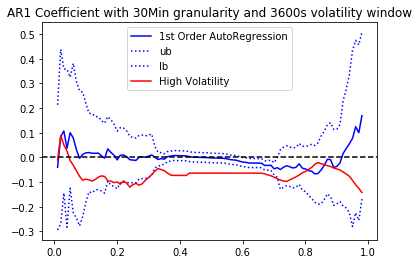

In [14]:
QAR.plot_ar1_coef_w_highvol(data['GBPUSD'], granularity = '30Min', vol_window = '3600s')

### USDJPY
Similarly, for USDJPY, the first order autoregressor is also barely significant. However, the high volatility regressor is well defined and strongly negative. Running an F-test on both autoregressors would give a significant result. 

C:\Users\limpe\Desktop\Quantile Regression\quantile_autoreg.py:16: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  series = series.groupby(pd.TimeGrouper(freq=granularity)).last().fillna(method = 'ffill')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


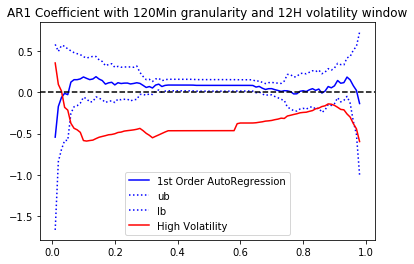

In [11]:
QAR.plot_ar1_coef_w_highvol(data['USDJPY'], granularity = '120Min', vol_window = '12H')